<a href="https://colab.research.google.com/github/Vivekshrotriya1/Capgemini-Training/blob/main/Classification_27_02_026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

Scenario‑Based Question 🚗 Context:

A car insurance company wants to predict whether a driver is likely to file a claim in the next year. They collect data on drivers’ ages and whether they filed a claim (1 = claim filed, 0 = no claim).

Question: Using logistic regression, build a model that predicts the probability of filing a claim based on driver age.

Split the dataset into training and testing sets.
Train a logistic regression model.
Evaluate its accuracy on the test set.
Plot the logistic curve showing how the probability of filing a claim changes with age.
Interpret the curve: At what age does the probability of filing a claim cross 50%?
This context makes logistic regression relatable to business and risk management, showing students how the same technique applies in industries like insurance. Would you like me to prepare multiple scenario variations (e.g., healthcare, retail, sports) so you can rotate them in class and keep students engaged?

Logistic Regression Demo: Insurance Claim Prediction Context: Predicting whether a driver files a claim based on age

Accuracy: 0.3333333333333333


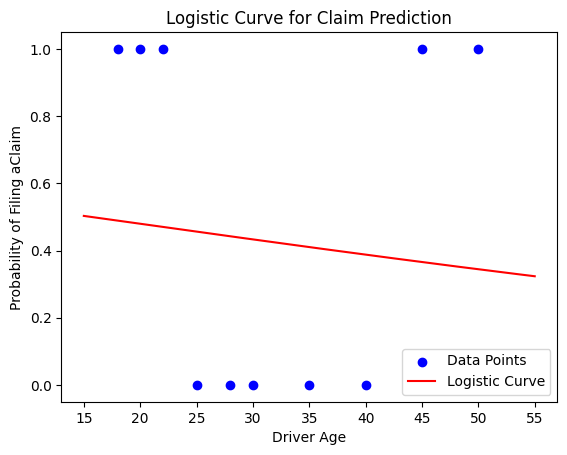

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=np.array([[18],[20],[22],[25],[28],[30],[35],[40],[45],[50]])
y=np.array([1,1,1,0,0,0,0,0,1,1])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

plt.scatter(X,y,color='blue',label='Data Points')
x_range=np.linspace(15,55,200).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color='red',label='Logistic Curve')
plt.xlabel('Driver Age')
plt.ylabel('Probability of Filing aClaim')
plt.title('Logistic Curve for Claim Prediction')
plt.legend()
plt.show()

#Scenario 🏥

A hospital wants to predict whether patients are at risk of developing diabetes based on their BMI (Body Mass Index). They collect data from 10 patients, recording BMI values and whether the patient was diagnosed with diabetes (1 = diabetes, 0 = no diabetes).

Saving BMI_dataset.csv to BMI_dataset.csv
Accuracy: 1.0


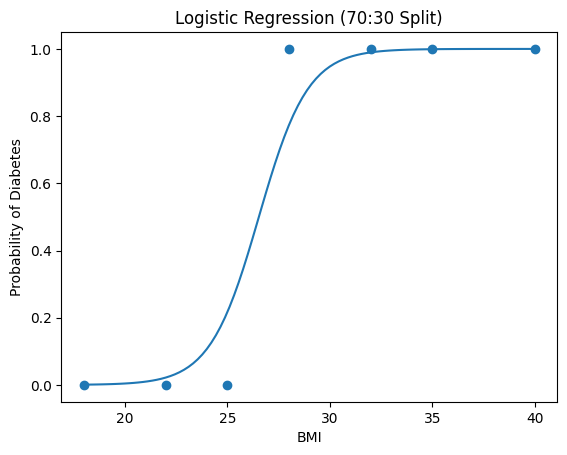

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("BMI_dataset.csv")
X = df[["BMI"]]
y = df["Diabetes"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

X_range = np.linspace(df["BMI"].min(), df["BMI"].max(), 100)
X_range_df = pd.DataFrame(X_range, columns=["BMI"])
y_prob = model.predict_proba(X_range_df)[:,1]

plt.scatter(X_train, y_train)
plt.plot(X_range, y_prob)
plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression (70:30 Split)")
plt.show()


#Scenario 🎬

A streaming platform wants to recommend movies to users based on their preferences.

Each movie is rated on three aspects:

Action Rating (how action‑packed it is)
Comedy Rating (how funny it is)
Drama Rating (how emotional it is) The platform collects data from past users about whether they liked (1) or didn’t like (0) certain movies.
Question for Students

Using the K‑Nearest Neighbors (KNN) algorithm:

Split the dataset into training and testing sets.
Scale the features (important for KNN).
Train models with different values of K (e.g., 1, 3, 5). Compare their accuracies.
Select the best model and predict whether a new user who prefers [Action=4, Comedy=2, Drama=4] will like the movie.
Discuss: How does changing K affect the model’s predictions?
This scenario makes KNN relatable to recommendation systems like Netflix or Spotify, showing students how algorithms decide what they might enjoy.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Movie dataset
# Features: [action_rating, comedy_rating, drama_rating]
# Label:    1=Will Like, 0=Won't Like
X = [[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],
     [3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for k in[1,3,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

# Best model — predict new user
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])


K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=1.00
Will they like it? 1


#Decision Tree
Scenario: Loan Officer’s Rulebook

Imagine you’re a loan officer at a bank. Every day, people apply for loans, and you need to decide whether to approve or reject them.

Instead of guessing, you build a rulebook (that’s your Decision Tree).

📋 The Data

Each applicant has:
Credit Score (how trustworthy they are with money)
Income (in thousands)
Employment status (1 = employed, 0 = not employed)
Past applications are labeled:
1 = Approved
0 = Rejected
This past data is like your training experience.

In [5]:
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = [
    [720, 60, 1], [580, 35, 0], [700, 55, 1],
    [600, 40, 1], [750, 80, 1], [500, 25, 0],
    [680, 50, 1], [550, 30, 0], [730, 70, 1],
    [610, 42, 0],
]
y = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

tree = DecisionTreeClassifier(max_depth=3,criterion='gini')
tree.fit(X_train,y_train)

feature_names = ["Credit Score", "Income", "Employment Status"]
print(export_text(tree,feature_names=feature_names))

y_pred=tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

applicant=[[710,39,1]]
descion = tree.predict(applicant)
print("Decision:", "Approved" if descion[0] == 1 else "Rejected")

|--- Income <= 46.00
|   |--- class: 0
|--- Income >  46.00
|   |--- class: 1

Accuracy: 1.0
Decision: Rejected


#Scenario:
University Admissions Rulebook Imagine you’re an admissions officer at a university. Every day, students apply for admission, and you need to decide whether to accept or reject them. Instead of guessing, you build a rulebook (that’s your Decision Tree).

📋 The Data

Each applicant has:
High School GPA (how well they performed academically)
Entrance Exam Score (their standardized test performance)
Extracurriculars (1 = active in clubs/sports, 0 = not active)
Past applications are labeled:
1 = Accepted
0 = Rejected This past data is like your training experience.
👉 Just like the loan officer uses credit score, income, and employment status to decide, here the admissions officer uses GPA, exam scores, and extracurriculars to make decisions.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()

df=pd.read_csv("University Dataset.csv")
X=df[["HighSchool_GPA", "Exam_Score", "Extracurriculars"]]
y=df["Admission_Label"]

X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.3, random_state=42
)

tree = DecisionTreeClassifier(max_depth=3, criterion="gini")
tree.fit(X_train, y_train)

feature_names=["HighSchool_GPA", "Exam_Score", "Extracurriculars"]
print(export_text(tree, feature_names=feature_names))

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

sample_students = pd.DataFrame({
    "HighSchool_GPA": [4.2, 2.5, 3.2],
    "Exam_Score": [85, 60, 70],
    "Extracurriculars": [1, 0, 1]
})

predictions = tree.predict(sample_students)

sample_students["Prediction"] = predictions

print(sample_students)

Saving University Dataset.csv to University Dataset.csv
|--- Exam_Score <= 1100.00
|   |--- class: 0
|--- Exam_Score >  1100.00
|   |--- class: 1

Accuracy: 0.8333333333333334
   HighSchool_GPA  Exam_Score  Extracurriculars  Prediction
0             4.2          85                 1           0
1             2.5          60                 0           0
2             3.2          70                 1           0


#Confusion Matrix
Scenario Question: Email Spam Filter

A company has built a machine learning model to detect spam emails.

True labels (y_true): Whether each email was actually spam (1 = Spam, 0 = Not Spam).
Predictions (y_pred): What the model guessed.
Probabilities (y_prob): How confident the model was in each prediction.
The company wants to evaluate the model using accuracy, precision, recall, F1 score, ROC-AUC,

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8

Confusion Matrix:
[[4 1]
 [1 4]]


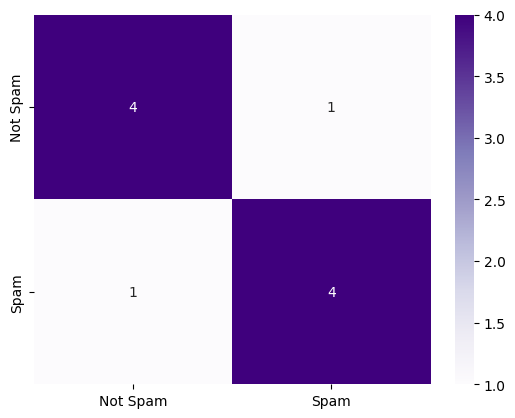

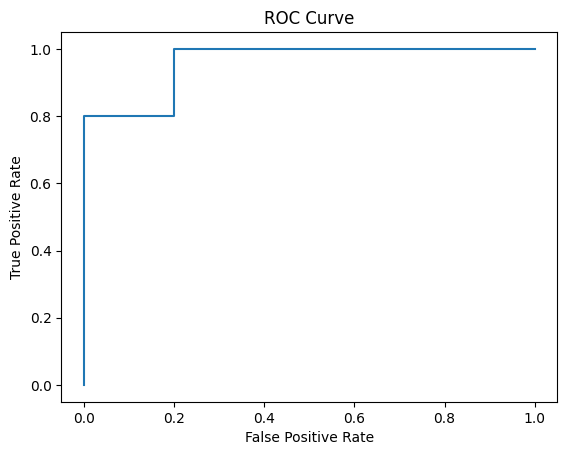

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])
y_prob = np.array([0.95, 0.10, 0.85, 0.40, 0.30, 0.60, 0.90, 0.20, 0.88, 0.05])



accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Purples',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam','Spam'])
print("\nConfusion Matrix:")
print(cm)



fpr, tpr, thresholds = roc_curve(y_true, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()